For one Ei, calculate resolution functions at a bunch of energy transfers

In [1]:
%cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [2]:
import numpy as np, os
from matplotlib import pyplot as plt
%matplotlib notebook
import histogram.hdf as hh, histogram as H

In [3]:
from dgsres.powder import use_ConstantQEKernel

In [4]:
from multiphonon import sqe

In [5]:
import mcvine

In [6]:
mcvine.version

'v1.3.2a10'

## Explanation of parameters
* Q=7. If choose center of the dynamic range, Q should be around 8. But the coverage of ARCS det system is not very good near that. That is why we use Q=7. See the IQE plot below
* ncount=1e7 and nodes=20 takes about 10min per energy
* dE probably should be around 0.5% of the Ei

<IPython.core.display.Javascript object>


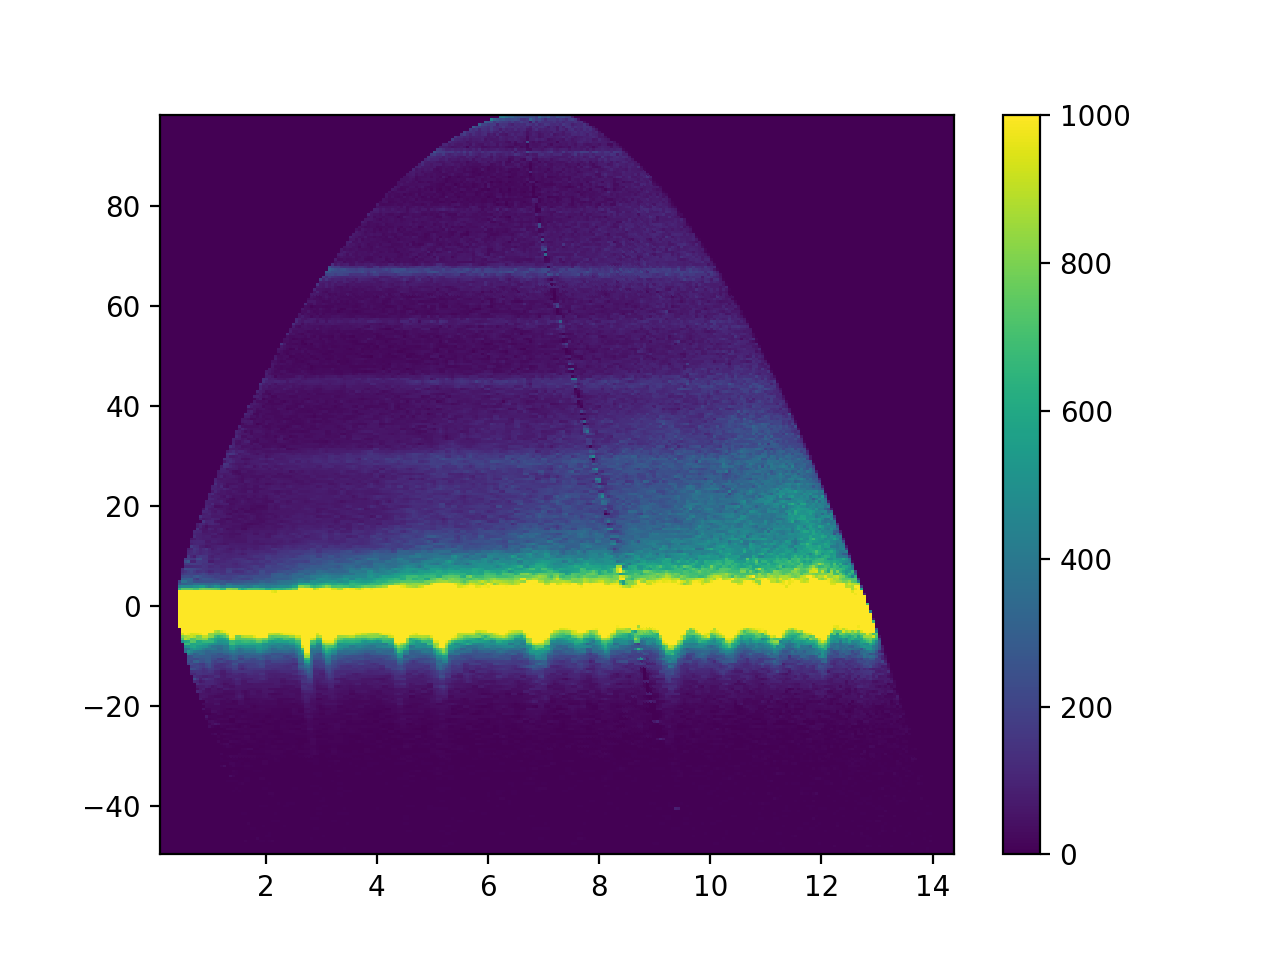

In [7]:
iqe = hh.load('/SNS/ARCS/2009_2_18_SCI/shared/C4H2I2S/C4H2I2S_50K_100meV/iqe_n_c_m3_C4H2I2S_50K_100meV.h5')
plt.figure()
sqe.plot(iqe)
plt.clim(0, 1000)

In [8]:
sim = use_ConstantQEKernel.Sim(
    workdir = "/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/mcvine-res-Ei_100-mcvine_1.3.2a10",
    beamdir = "/SNS/users/lj7/simulations/ARCS/beam/100meV-n1e10-Fermi_600-T0_120-2018/",
    Ei = 100,
    Q = 5.6,
    dQ_axis = (-1, 1, 0.02),
    dE_axis = (-30, 20, 0.2),
    ncount = 1e7,
    nodes = 20
)

## Test one E

In [9]:
%%time
sim.run(E=0.)

CPU times: user 59.3 ms, sys: 15.5 ms, total: 74.9 ms
Wall time: 8min 58s


/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [10]:
ls -l {sim.workdir}/out

total 61
-rw-r--r-- 1 lj7 users 21919 Aug 20 22:27 ie-Q_5.6-E_0.0.h5
-rw-r--r-- 1 lj7 users 61013 Aug 20 22:27 iqe-Q_5.6-E_0.0.h5


<IPython.core.display.Javascript object>


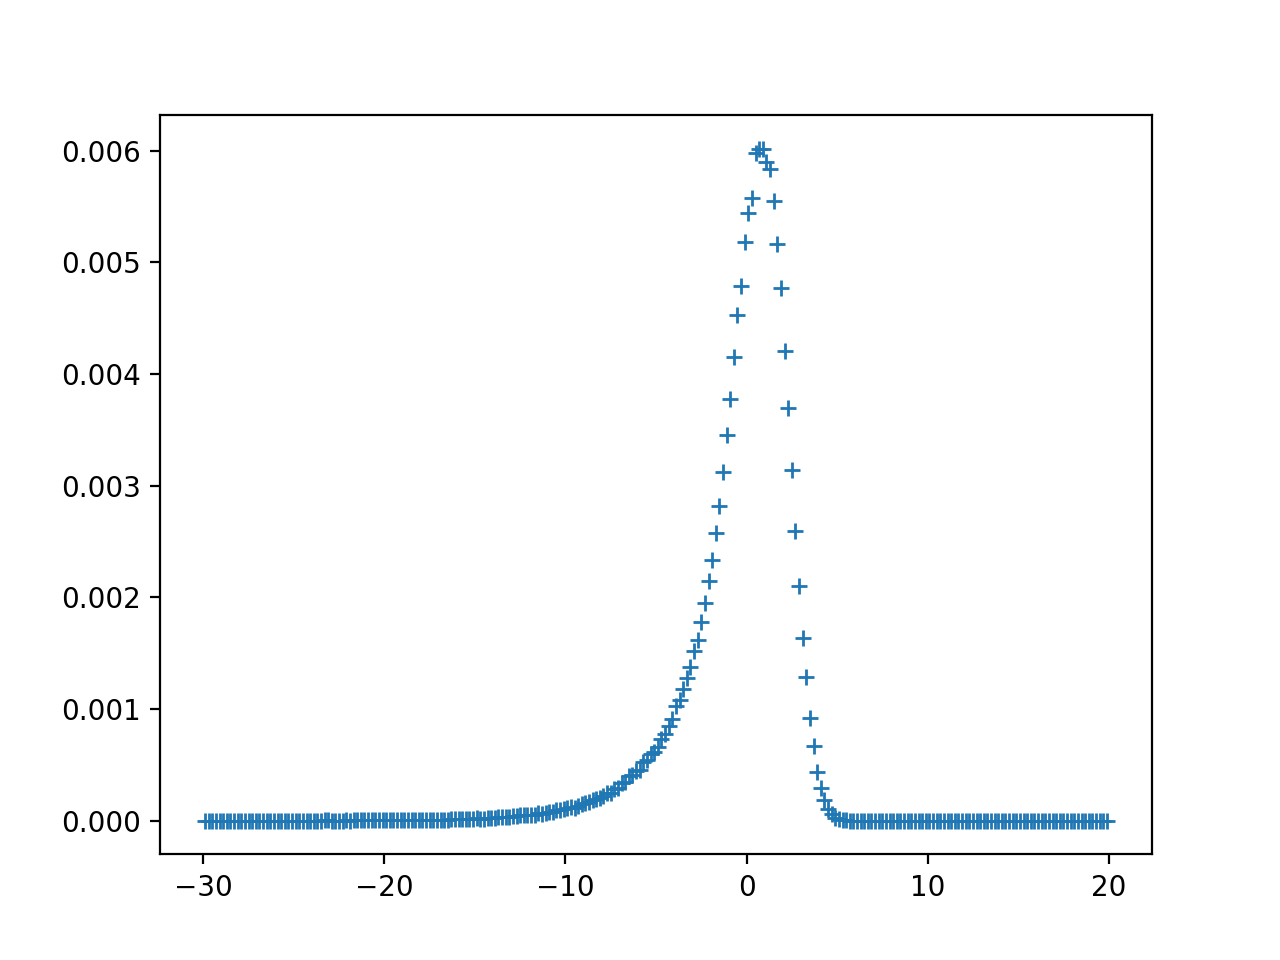

In [11]:
hist = hh.load(os.path.join(sim.outdir, 'ie-Q_5.6-E_0.0.h5'))
plt.figure()
plt.plot(hist.E, hist.I, '+')

## Run all Es

In [ ]:
%%time
for E in np.arange(-90., 100.-1, 10.):
    if os.path.exists(os.path.join(sim.outdir, 'iqe-Q_5.6-E_%s.h5' % E)): continue
    print E
    sim.run(E)

-90.0
-80.0
-70.0
-60.0
-50.0
-40.0
-30.0


In [14]:
ls {sim.outdir}

ie-Q_5.6-E_0.0.h5    ie-Q_5.6-E_-70.0.h5   iqe-Q_5.6-E_-40.0.h5
ie-Q_5.6-E_-10.0.h5  ie-Q_5.6-E_70.0.h5    iqe-Q_5.6-E_40.0.h5
ie-Q_5.6-E_10.0.h5   ie-Q_5.6-E_-80.0.h5   iqe-Q_5.6-E_-50.0.h5
ie-Q_5.6-E_-20.0.h5  ie-Q_5.6-E_80.0.h5    iqe-Q_5.6-E_50.0.h5
ie-Q_5.6-E_20.0.h5   ie-Q_5.6-E_-90.0.h5   iqe-Q_5.6-E_-60.0.h5
ie-Q_5.6-E_-30.0.h5  ie-Q_5.6-E_90.0.h5    iqe-Q_5.6-E_60.0.h5
ie-Q_5.6-E_30.0.h5   iqe-Q_5.6-E_0.0.h5    iqe-Q_5.6-E_-70.0.h5
ie-Q_5.6-E_-40.0.h5  iqe-Q_5.6-E_-10.0.h5  iqe-Q_5.6-E_70.0.h5
ie-Q_5.6-E_40.0.h5   iqe-Q_5.6-E_10.0.h5   iqe-Q_5.6-E_-80.0.h5
ie-Q_5.6-E_-50.0.h5  iqe-Q_5.6-E_-20.0.h5  iqe-Q_5.6-E_80.0.h5
ie-Q_5.6-E_50.0.h5   iqe-Q_5.6-E_20.0.h5   iqe-Q_5.6-E_-90.0.h5
ie-Q_5.6-E_-60.0.h5  iqe-Q_5.6-E_-30.0.h5  iqe-Q_5.6-E_90.0.h5
ie-Q_5.6-E_60.0.h5   iqe-Q_5.6-E_30.0.h5


<IPython.core.display.Javascript object>


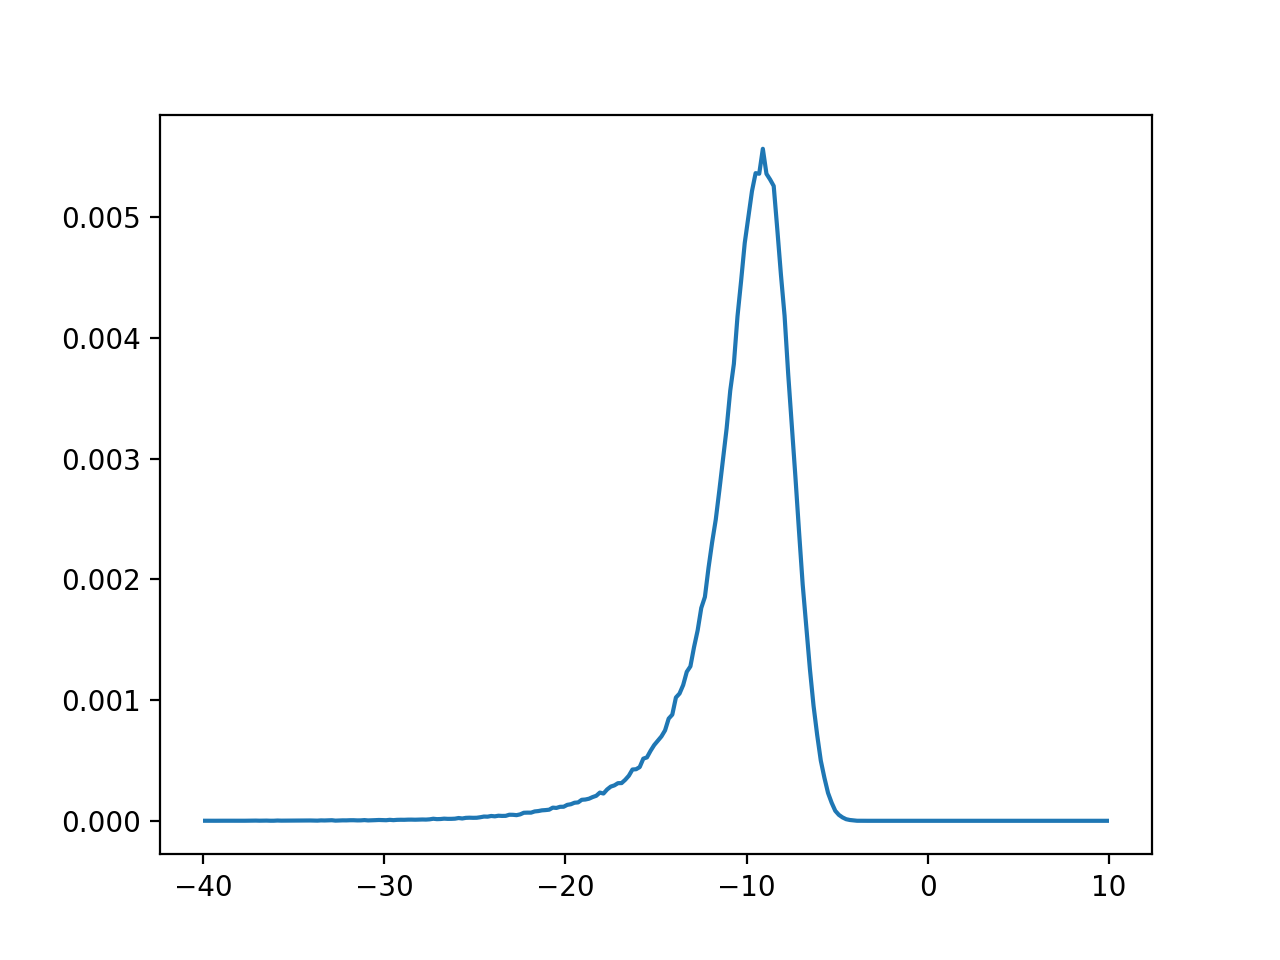

In [15]:
ie = hh.load(os.path.join(sim.outdir, 'ie-Q_5.6-E_-10.0.h5'))
plt.figure()
plt.plot(ie.E, ie.I)

# Compare to previous results

In [24]:
sim.outdir

'/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/mcvine-res-Ei_100-mcvine_1.3.2a10/out'

In [17]:
previous_dir = 'mcvine-res-Ei_100/'

In [19]:
ls {previous_dir}/out

ie-Q_5.6-E_0.0.h5    ie-Q_5.6-E_-70.0.h5   iqe-Q_5.6-E_-40.0.h5
ie-Q_5.6-E_-10.0.h5  ie-Q_5.6-E_70.0.h5    iqe-Q_5.6-E_40.0.h5
ie-Q_5.6-E_10.0.h5   ie-Q_5.6-E_-80.0.h5   iqe-Q_5.6-E_-50.0.h5
ie-Q_5.6-E_-20.0.h5  ie-Q_5.6-E_80.0.h5    iqe-Q_5.6-E_50.0.h5
ie-Q_5.6-E_20.0.h5   ie-Q_5.6-E_-90.0.h5   iqe-Q_5.6-E_-60.0.h5
ie-Q_5.6-E_-30.0.h5  ie-Q_5.6-E_90.0.h5    iqe-Q_5.6-E_60.0.h5
ie-Q_5.6-E_30.0.h5   iqe-Q_5.6-E_0.0.h5    iqe-Q_5.6-E_-70.0.h5
ie-Q_5.6-E_-40.0.h5  iqe-Q_5.6-E_-10.0.h5  iqe-Q_5.6-E_70.0.h5
ie-Q_5.6-E_40.0.h5   iqe-Q_5.6-E_10.0.h5   iqe-Q_5.6-E_-80.0.h5
ie-Q_5.6-E_-50.0.h5  iqe-Q_5.6-E_-20.0.h5  iqe-Q_5.6-E_80.0.h5
ie-Q_5.6-E_50.0.h5   iqe-Q_5.6-E_20.0.h5   iqe-Q_5.6-E_-90.0.h5
ie-Q_5.6-E_-60.0.h5  iqe-Q_5.6-E_-30.0.h5  iqe-Q_5.6-E_90.0.h5
ie-Q_5.6-E_60.0.h5   iqe-Q_5.6-E_30.0.h5


<IPython.core.display.Javascript object>


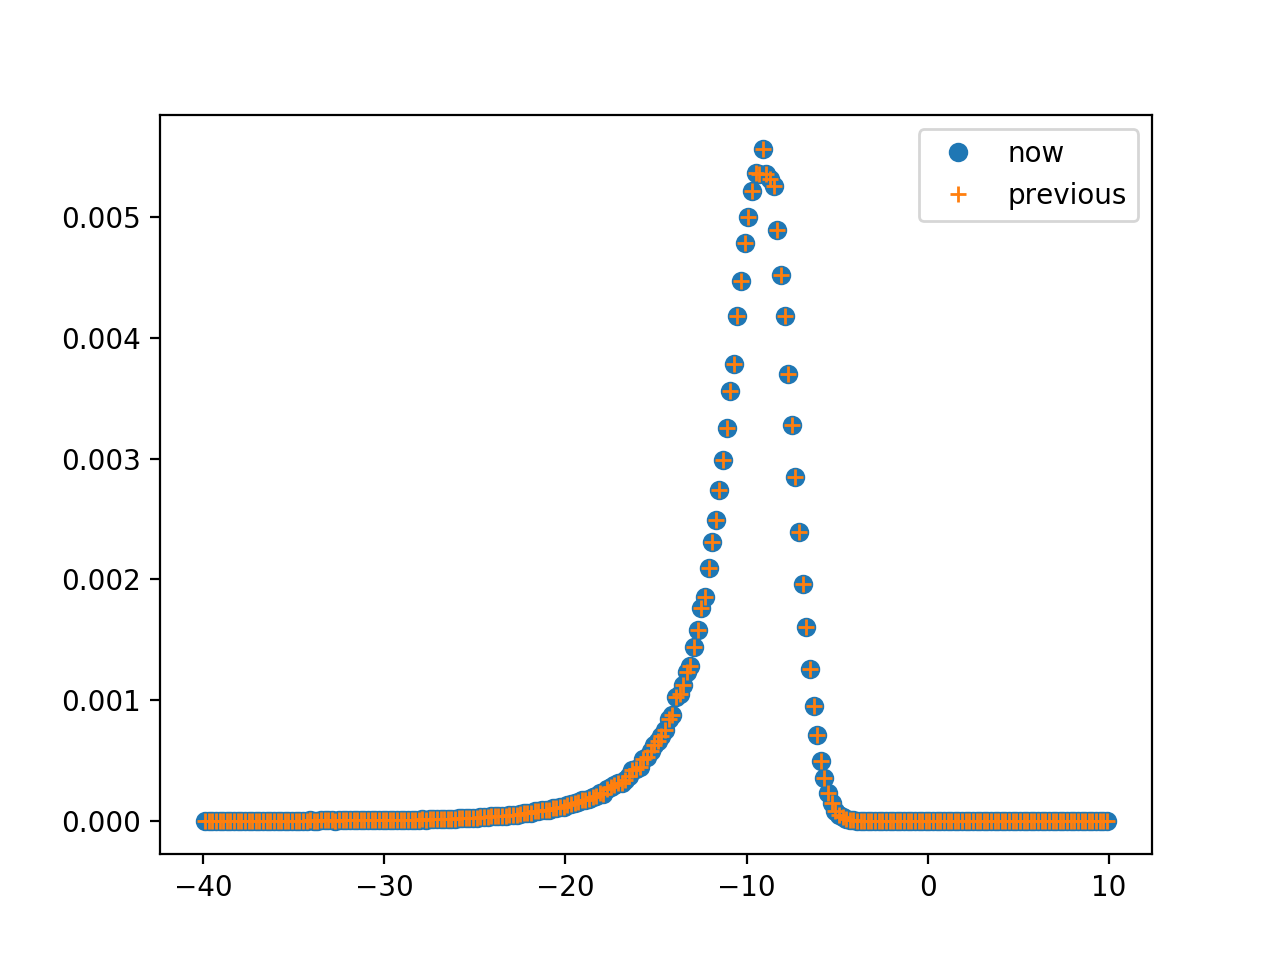

In [25]:
plt.figure()

ie = hh.load(os.path.join(sim.outdir, 'ie-Q_5.6-E_-10.0.h5'))
plt.plot(ie.E, ie.I, 'o', label='now')

ie2 = hh.load(os.path.join(previous_dir, 'out', 'ie-Q_5.6-E_-10.0.h5'))
plt.plot(ie.E, ie.I, '+', label='previous')

plt.legend()

<IPython.core.display.Javascript object>


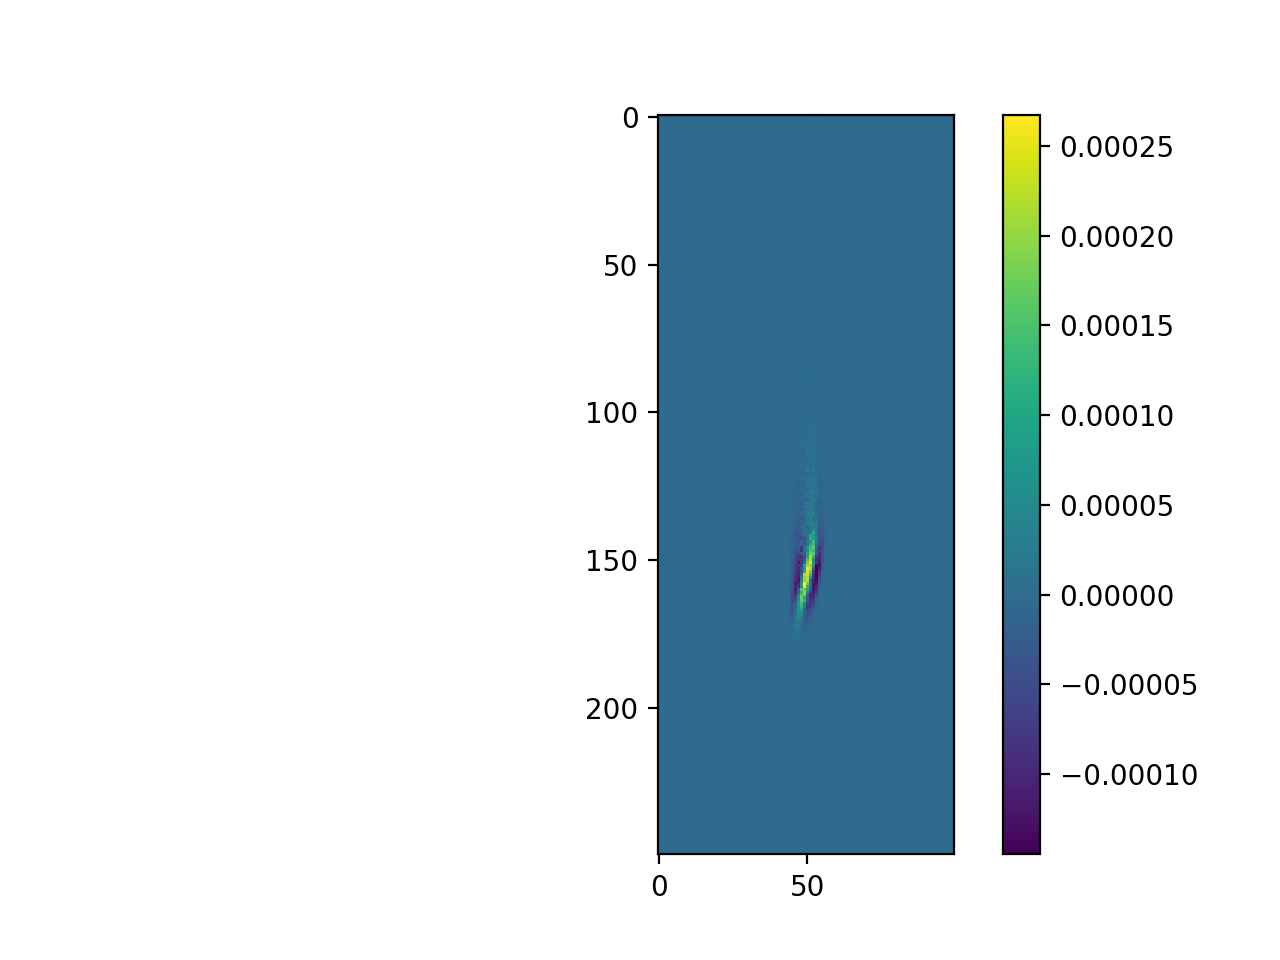

In [32]:
plt.figure()

iqe = hh.load(os.path.join(sim.outdir, 'iqe-Q_5.6-E_-10.0.h5'))

iqe2 = hh.load(os.path.join(previous_dir, 'out', 'iqe-Q_5.6-E_-10.0.h5'))

diff = iqe2 - iqe

plt.imshow(diff.I.T)
plt.colorbar()


<IPython.core.display.Javascript object>


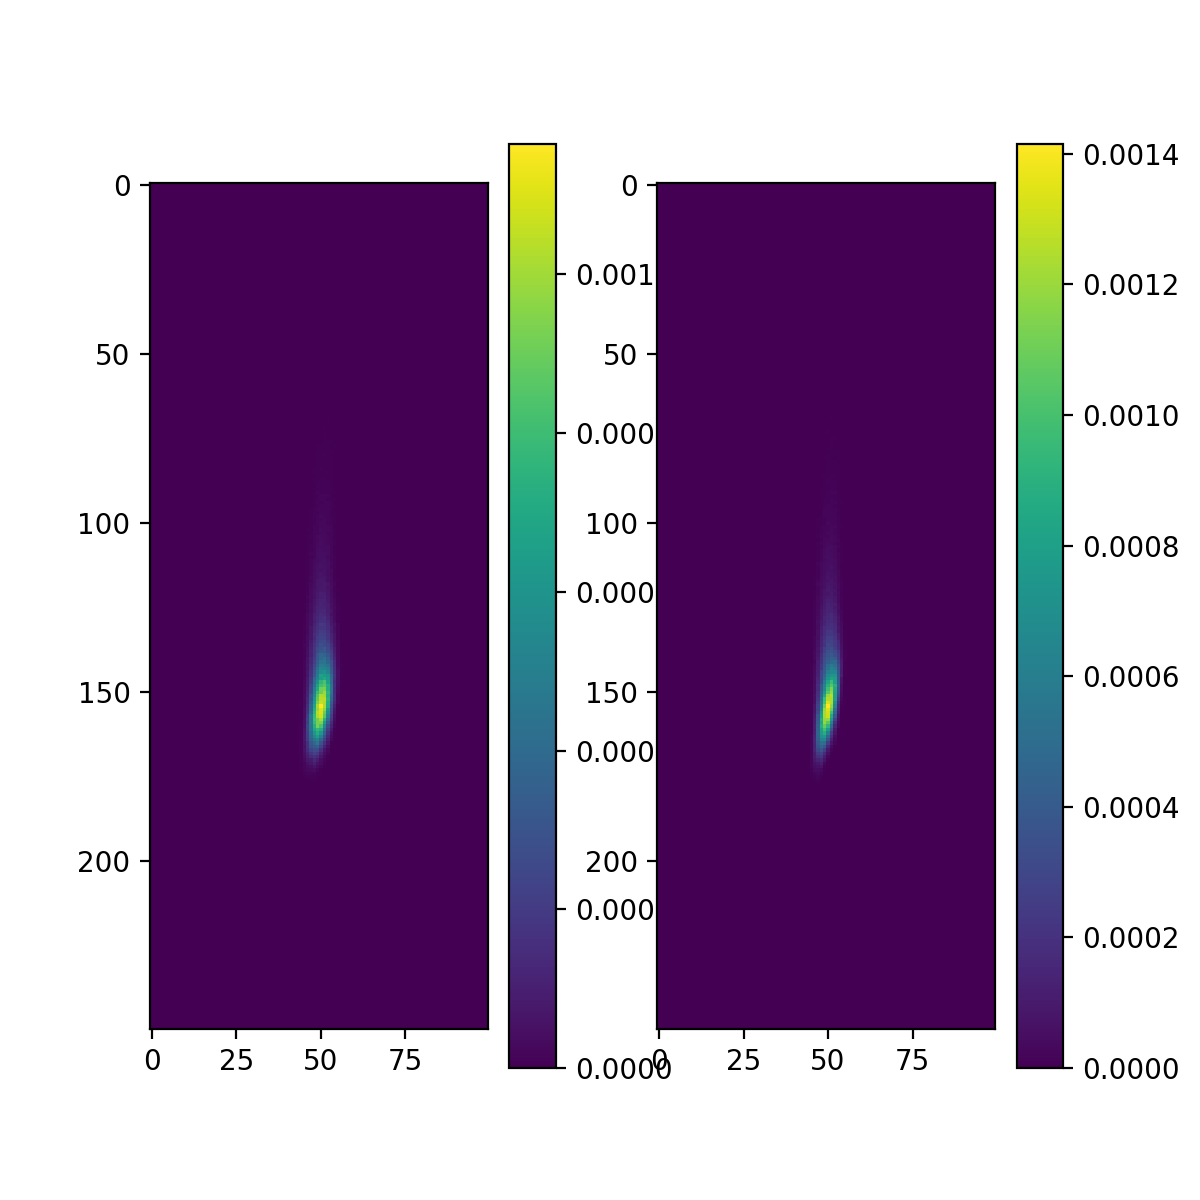

In [35]:
plt.figure(figsize=(6,6))

iqe = hh.load(os.path.join(sim.outdir, 'iqe-Q_5.6-E_-10.0.h5'))

iqe2 = hh.load(os.path.join(previous_dir, 'out', 'iqe-Q_5.6-E_-10.0.h5'))

plt.subplot(1,2,1); plt.imshow(iqe.I.T); plt.colorbar()
plt.subplot(1,2,2); plt.imshow(iqe2.I.T); plt.colorbar()
